In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
Data = pd.read_csv(r"C:\Users\sk062\Documents\Data\Google Search\Search.csv",encoding= "shift-jis")
Data["Data"] = pd.to_datetime(Data["Data"])
Data.head()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,2019-12-15,43,22,62,6
1,2019-12-22,47,22,65,4
2,2019-12-29,51,26,100,3
3,2020-01-05,44,20,74,4
4,2020-01-12,41,23,68,4


In [47]:
Data["AIR JORDAN"].mean()

48.66793893129771

In [48]:
# 代表値
print("Dataの要約統計量")
print(Data.describe().round(4))

Dataの要約統計量
                      Data  AIR JORDAN  AIR FORCE   AIR MAX      DUNK
count                  262    262.0000   262.0000  262.0000  262.0000
mean   2022-06-15 12:00:00     48.6679    30.6374   44.8359    7.5229
min    2019-12-15 00:00:00     19.0000    15.0000   22.0000    2.0000
25%    2021-03-15 18:00:00     43.0000    23.2500   34.2500    4.0000
50%    2022-06-15 12:00:00     48.0000    30.5000   43.0000    6.0000
75%    2023-09-15 06:00:00     53.0000    37.0000   52.0000    8.0000
max    2024-12-15 00:00:00     94.0000    60.0000  100.0000   32.0000
std                    NaN      9.5745     8.4605   13.2740    5.7879


In [49]:
print(Data["AIR JORDAN"].describe())
print(Data["AIR FORCE"].describe())
print(Data["AIR MAX"].describe())
print(Data["DUNK"].describe())

count    262.000000
mean      48.667939
std        9.574493
min       19.000000
25%       43.000000
50%       48.000000
75%       53.000000
max       94.000000
Name: AIR JORDAN, dtype: float64
count    262.000000
mean      30.637405
std        8.460536
min       15.000000
25%       23.250000
50%       30.500000
75%       37.000000
max       60.000000
Name: AIR FORCE, dtype: float64
count    262.000000
mean      44.835878
std       13.273998
min       22.000000
25%       34.250000
50%       43.000000
75%       52.000000
max      100.000000
Name: AIR MAX, dtype: float64
count    262.000000
mean       7.522901
std        5.787873
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       32.000000
Name: DUNK, dtype: float64


In [50]:
print(Data.dtypes)

Data          datetime64[ns]
AIR JORDAN             int64
AIR FORCE              int64
AIR MAX                int64
DUNK                   int64
dtype: object


In [51]:
# AIR_JORDANの中央値
print("AIRJORDANの中央値")
print(Data["AIR JORDAN"].median())
# AIR_FORCEの中央値
print("AIR_FORCEの中央値")
print(Data["AIR FORCE"].median())
# AIR_MAXの中央値
print("AIR_MAXの中央値")
print(Data["AIR MAX"].median())
# DUNKの中央値
print("DUNKの中央値")
print(Data["DUNK"].median())

AIRJORDANの中央値
48.0
AIR_FORCEの中央値
30.5
AIR_MAXの中央値
43.0
DUNKの中央値
6.0


In [52]:
# AIR_JORDANの最頻値
print("AIR JORDANの最頻値")
print(Data["AIR JORDAN"].mode())

# AIR_FORCEの最頻値
print("AIR FORCEの最頻値")
print(Data["AIR FORCE"].mode())

# AIR_MAXの最頻値
print("AIR MAXの最頻値")
print(Data["AIR MAX"].mode())

# DUNKの最頻値
print("DUNKの最頻値")
print(Data["DUNK"].mode())

AIR JORDANの最頻値
0    43
Name: AIR JORDAN, dtype: int64
AIR FORCEの最頻値
0    39
Name: AIR FORCE, dtype: int64
AIR MAXの最頻値
0    40
1    46
Name: AIR MAX, dtype: int64
DUNKの最頻値
0    6
Name: DUNK, dtype: int64


In [53]:
Data_Check = Data.drop(["Data"],axis=1)
Data_Check

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,43,22,62,6
1,47,22,65,4
2,51,26,100,3
3,44,20,74,4
4,41,23,68,4
...,...,...,...,...
257,51,23,46,6
258,53,27,38,6
259,52,29,28,3
260,51,25,27,3


In [54]:
bins = [0,10,20,30,40,50,60,70,80,90,100]

# 各カラムの度数分布を計算
freq_tables = {}
for col in Data_Check.columns:
    freq = pd.cut(Data_Check[col], bins=bins).value_counts().sort_index()
    freq_tables[col] = freq

# 結果をデータフレームにまとめる
freq_df = pd.DataFrame(freq_tables)
freq_df.index = [f"{interval.left}~{interval.right}" for interval in freq_df.index]

# 度数分布表の出力
print("度数分布表")
freq_df

度数分布表


,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0~10,0,0,0,213
10~20,1,38,0,35
20~30,5,93,34,13
30~40,28,103,78,1
40~50,129,25,75,0
50~60,70,3,38,0
60~70,21,0,28,0
70~80,7,0,7,0
80~90,0,0,0,0
90~100,1,0,2,0


各スニーカーの検索数のヒストグラム


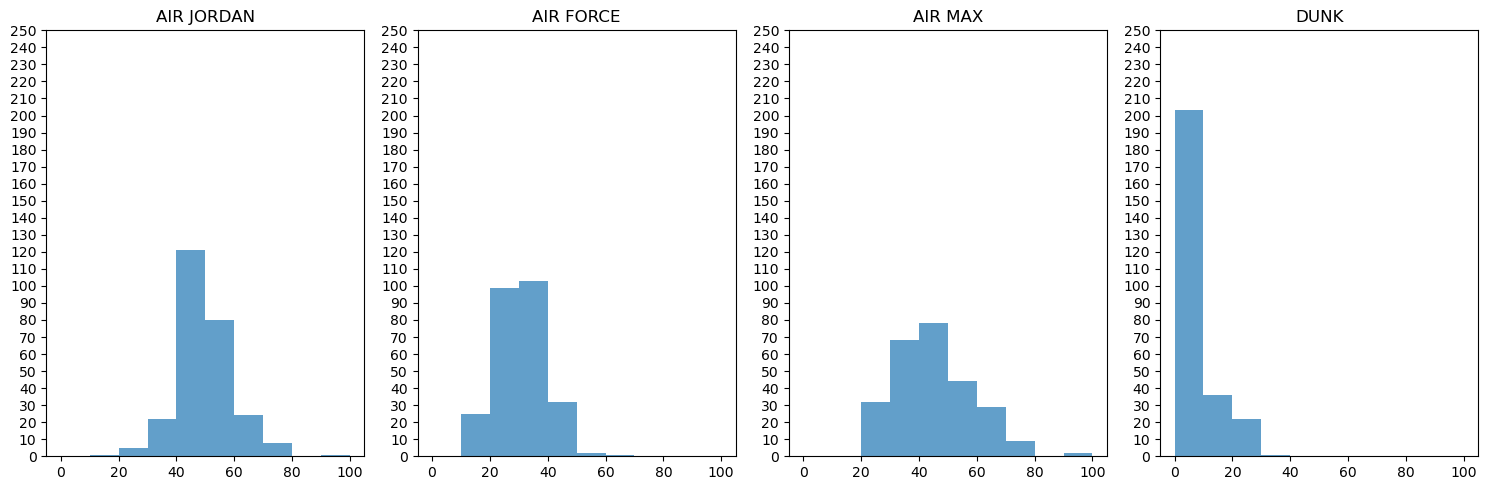

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, col in enumerate(Data_Check.columns):
    ax = axes[i]
    Data_Check[col].hist(bins=bins, ax=ax, alpha=0.7, grid=False)
    ax.set_ylim(0, 250)
    ax.set_yticks(range(0, 251, 10))
    ax.set_title(col)

plt.tight_layout()

print("各スニーカーの検索数のヒストグラム")
plt.show()

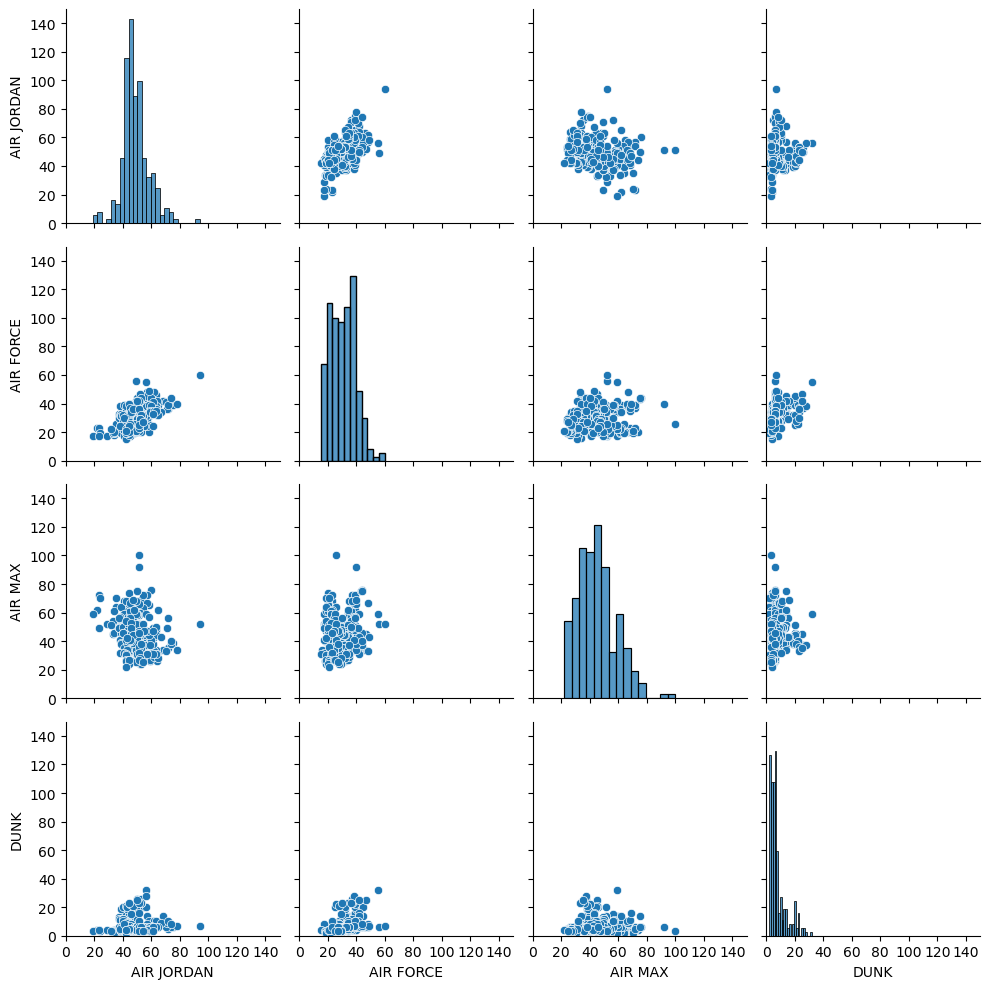

In [56]:
# ペアプロットの作成
pairplot = sns.pairplot(Data_Check)

# 各軸の範囲と目盛りを設定
for ax in pairplot.axes.flatten():  # 各プロットの軸にアクセス
    if ax is not None:  # 空の軸が存在する可能性があるためチェック
        ax.set_xlim(0, 150)
        ax.set_ylim(0, 150)
        ax.set_xticks(range(0, 151, 20))
        ax.set_yticks(range(0, 151, 20))

# グラフの表示
plt.tight_layout()
plt.show()

In [57]:
Corr_matrix = Data_Check.corr()
Corr_matrix

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
AIR JORDAN,1.000000,0.541493,-0.216011,0.128218
AIR FORCE,0.541493,1.000000,0.064255,0.475298
AIR MAX,-0.216011,0.064255,1.000000,-0.022517
DUNK,0.128218,0.475298,-0.022517,1.000000


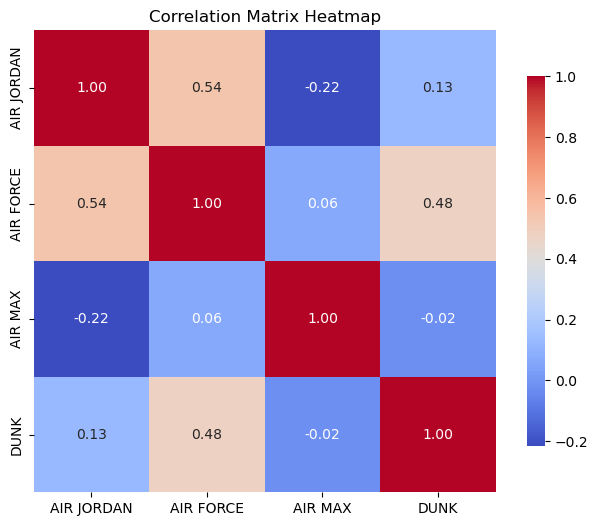

In [58]:
# ヒートマップの描画
plt.figure(figsize=(8, 6))  # 図のサイズを指定
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
TIME = Data[ "Data" ]
AIR_JORDAN = Data[ "AIR JORDAN"] 
AIR_MAX = Data[ "AIR FORCE" ]
AIR_FORCE = Data[ "AIR MAX" ]
DUNK = Data[ "DUNK" ]

In [60]:
print( Data.dtypes )

Data          datetime64[ns]
AIR JORDAN             int64
AIR FORCE              int64
AIR MAX                int64
DUNK                   int64
dtype: object


In [61]:
import matplotlib.dates as mdates

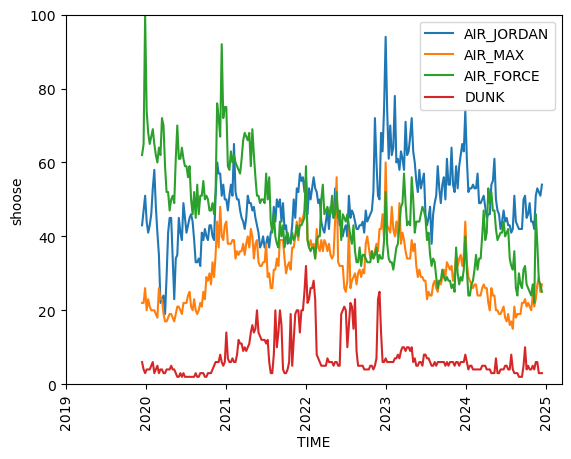

In [63]:
fig,ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(TIME, AIR_JORDAN, label = "AIR_JORDAN" )
ax.plot(TIME, AIR_MAX, label = "AIR_MAX" )
ax.plot(TIME, AIR_FORCE, label = "AIR_FORCE" )
ax.plot(TIME, DUNK, label = "DUNK" )

ax.set_xlabel("TIME")
ax.set_ylabel("shoose")

# X軸目盛りを設定
years = ["2019", "2020", "2021", "2022", "2023", "2024", "2025"]  # 目盛りに表示したい年
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in years]))  # 各年の1月1日を設定
ax.set_xticklabels(years)  # ラベルを年にする

ax.set_ylim(0, 100)               # Y軸の範囲 (例: 0 から 100)

ax.grid(False)
ax.legend(loc='upper right')

plt.show()

In [69]:
Data["fluctuation_AIRJIORDAN"] = Data['AIR JORDAN'] - Data['AIR JORDAN'].shift(1)
Data["fluctuation_AIR_FORCE"] = Data['AIR FORCE'] - Data['AIR FORCE'].shift(1)
Data["fluctuation_AIR_MAX"] = Data['AIR MAX'] - Data['AIR MAX'].shift(1)
Data["fluctuation_DUNK"] = Data['DUNK'] - Data['DUNK'].shift(1)
Data.head()


,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK,fluctuation,fluctuation_AIRJIORDAN,fluctuation_AIR_FORCE,fluctuation_AIR_MAX,fluctuation_DUNK
0,2019-12-15,43,22,62,6,NaN,NaN,NaN,NaN,NaN
1,2019-12-22,47,22,65,4,4.0,4.0,0.0,3.0,-2.0
2,2019-12-29,51,26,100,3,4.0,4.0,4.0,35.0,-1.0
3,2020-01-05,44,20,74,4,-7.0,-7.0,-6.0,-26.0,1.0
4,2020-01-12,41,23,68,4,-3.0,-3.0,3.0,-6.0,0.0
